In [1]:
from q_learning import *
# from utils import *
import gym
import matplotlib.pyplot as plt

env = gym.make('MountainCar-v0', render_mode='rgb_array')

inp = Input(shape=(2,))
x = Dense(200, activation='relu')(inp)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
out = Dense(3, activation='linear')(x)
model = Model(inp, out)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001))


2023-06-22 20:07:59.610666: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 20:08:00.208693: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zoid/miniconda3/envs/ai/lib/
2023-06-22 20:08:00.208770: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zoid/miniconda3/envs/ai/lib/
2023-06-22 20:08:00.208776: W tensorflow/compiler/tf2tenso

In [2]:

exp_replay = ExperienceReplay(max_memory=5000)
traget_net = TargetNetwork(model)
agent = QLearningAgent(model, traget_net, env, exp_replay, batch_size=1000, frequency=5, epsilon=0.05, max_time=300, gamma=0.99, step_size=0.5, show_video=False)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......input_layer
.........vars
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-06-22 20:08:01       345960
metadata.json                                  2023-06-22 20:08:01           64
config.json                                    2023-06-22 20:08:01         2985
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-06-22 20:08:00       345960
metadata.json                                  2023-06-22 20:08:00           64
config.jso

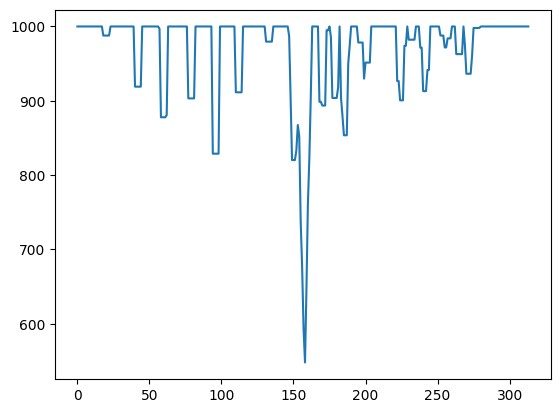

game_play :  1000



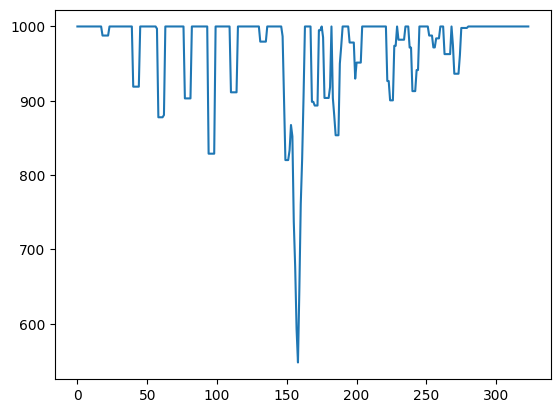

In [9]:

for i in range(100):
    agent.epsilon = max(0.8*(0.9**(i+1)), 0.05)
    agent.frequency = 5
    # agent.gamma = 0.9
    agent.step_size = 0.9
    agent.max_time = 1000
    agent.train(10)
    avg_sum = []
    for i in range(len(agent.history)-5):
        avg_sum.append(np.mean(agent.history[i:i+5]))
    plt.plot(avg_sum)
    plt.show()

# agent.history = []

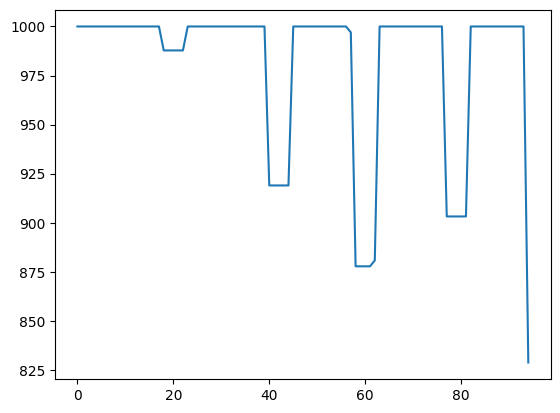

In [4]:
avg_sum = []
for i in range(len(agent.history)-5):
    avg_sum.append(np.mean(agent.history[i:i+5]))
plt.plot(avg_sum)
plt.show()

In [5]:
import pickle
with open('MountainCar.pkl', 'wb') as f:
    pickle.dump(model, f)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......input_layer
.........vars
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-06-22 20:11:26      1004824
metadata.json                                  2023-06-22 20:11:26           64
config.json                                    2023-06-22 20:11:26         2985


In [ ]:
# history = []
# for game in range(100):
#     state = env.reset()[0]
#     done = False
#     t = 0
#     while (not done) and (t<500):
#         q_vals = model(np.array([state]))[0]
#         action = np.argmax(q_vals)
#         state, reward, done, trunc, info = env.step(action)
#         if done:
#             break
#         t += 1
#     history.append(t)

# plt.plot(history)
# plt.show()

In [ ]:
# import cv2, pickle, gym
# import numpy as np
# import matplotlib.pyplot as plt
# model2 = pickle.load(open('AcroBot.pkl', 'rb'))
# history = []
# env = gym.make('Acrobot-v1', render_mode='rgb_array')
# for game in range(100):
#     state = env.reset()[0]
#     done = False
#     t = 0
#     while (not done) and (t<500):
#         img = env.render()
#         q_vals = model2(np.array([state]))[0]
#         action = np.argmax(q_vals)
#         state, reward, done, trunc, info = env.step(action)
#         if done:
#             break
#         t += 1
#         # cv2.imshow('img', img) 
#         # cv2.waitKey(30) 
#     history.append(t)


In [ ]:
# avg_sum = []
# for i in range(len(history)-20):
#     avg_sum.append(np.mean(history[i:i+20]))
# plt.plot(avg_sum)
# plt.show()